In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv(r"C:\Users\amith\Downloads\student_pass_fail.csv")


print("Missing Values:\n", df.isnull().sum())

print("\nData Description:\n", df.describe())

Missing Values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64

Data Description:
        Study Hours  Attendance        Pass
count   100.000000  100.000000  100.000000
mean     14.387077   69.332717    0.030000
std       8.850118   17.588203    0.171447
min       0.194963   40.034314    0.000000
25%       6.801792   53.789290    0.000000
50%      14.463107   68.190871    0.000000
75%      21.321317   85.664759    0.000000
max      29.926128   99.956948    1.000000


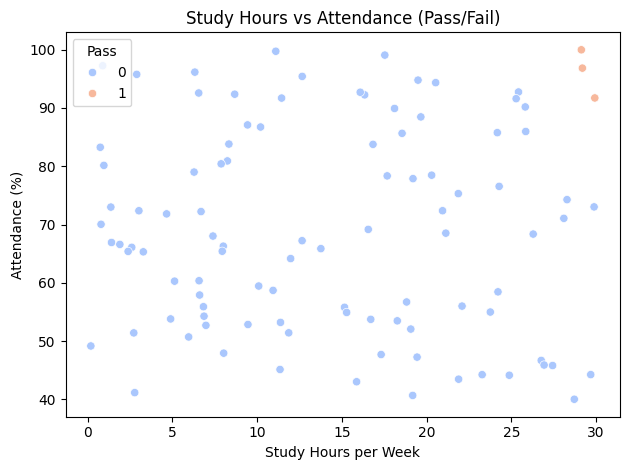

In [3]:
sns.scatterplot(data=df, x="Study Hours", y="Attendance", hue="Pass", palette="coolwarm")
plt.title("Study Hours vs Attendance (Pass/Fail)")
plt.xlabel("Study Hours per Week")
plt.ylabel("Attendance (%)")
plt.legend(title="Pass")
plt.tight_layout()
plt.show()

In [4]:
X = df[["Study Hours", "Attendance"]]
y = df["Pass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


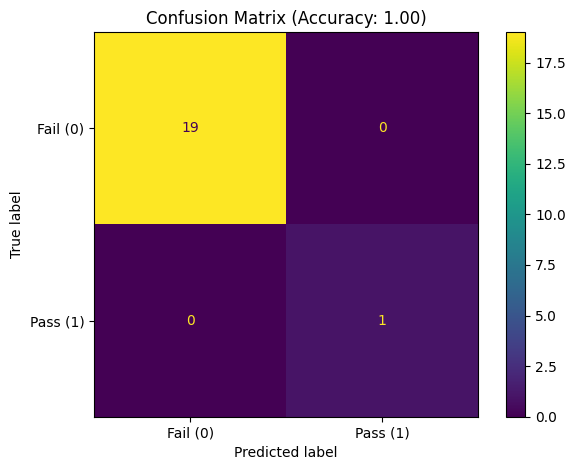

In [6]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail (0)", "Pass (1)"])
cmd.plot()
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.tight_layout()
plt.show()

Task 2


In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: C:\Users\amith\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)

In [27]:
df = pd.read_csv(r"C:\Users\amith\Downloads\reviews.csv")

In [ ]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    return text

df['Cleaned_Review'] = df['Review Text'].apply(clean_text)

In [29]:
vectorizer = TfidfVectorizer(stop_words='english')  
X = vectorizer.fit_transform(df['Cleaned_Review'])

In [30]:
y = df['Sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Model Evaluation Metrics:
Accuracy : 0.25
Precision: 0.00
Recall   : 0.00
F1 Score : 0.00

Classification Report:

              precision    recall  f1-score   support

    Negative       0.33      0.50      0.40         2
    Positive       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4

